<a href="https://colab.research.google.com/github/jjoannahao/Capstone_1/blob/main/Capstone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPSTONE 1: CLIFF WALKING

In this environment, the character (agent) aims to try to reach the goal (cookie) without falling off the cliff (burgundy squares).

### ACTION SPACE: (all actions agent can take)
* 0: move up
* 1: move right
* 2: move down
* 3: move left

### OBSERVATION SPACE: (what agent can see about environment)
36 possible states since the player cannot be at the cliff or at the goal. So, 3 rows and the bottom left cell where the character initially starts remain.

### REWARDS
* Taking one step = -1 reward
* If the player steps into the cliff, they receive a -100 reward

As a result, the ideal situation and maximum (ideal) possible reward is -13 (the minimum number of steps from the starting state to the goal)

array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]], dtype=uint8)
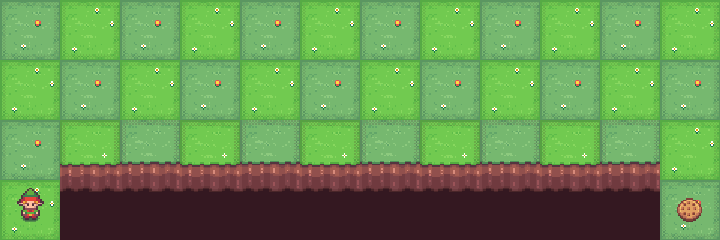

In [ ]:
# obtain necessary libraries for the program
!pip install gymnasium
import gymnasium as gym
import numpy as np
import time

# create the environment
env = gym.make('CliffWalking-v0', render_mode='rgb_array')
env.reset()
env.render()

In [ ]:
# Q-learning function
def qlearn(num_episodes, gamma=0.7):
    # initializing statistics
    rewards = []
    best_reward = -999
    best_episode = []

    ### algorithm
    Q = [[0 for col in range(env.unwrapped.nA)] for row in range(env.unwrapped.nS)]  # create q table

    for i in range(num_episodes):
        # initializing statistics for individual episodes
        episode = []
        episode_reward = 0

        state, _ = env.reset()  # get new enviro
        done = False
        while not done:  # while environment not solved
          value_noise = np.random.randn(1, env.unwrapped.nA)*(1./(i+1))  # add spontaneity to decision making
          # Spontaneity means the agent explore more rather than always going with the 'safe path'
          action_idx = np.argmax(Q[state] + value_noise)
          next_state, reward, done, _, _ = env.step(action_idx)
          Q[state][action_idx] = reward + gamma * np.max(Q[next_state])
          state = next_state

          ### Statistics & visualization ###
          episode_reward += reward  # accumulating total reward received in current episode
          episode.append(env.render())  # save frame of episode for later visualization

        if (i+1) % 50 == 0:
            print(f'Episode {i + 1} Reward: {episode_reward}')

        if episode_reward > best_reward:
            best_episode = episode

        rewards.append(episode_reward)

    return Q, rewards, best_episode

Q, rewards, best_episode = qlearn(1000)
print('Average reward for first 100 episodes:', np.mean(rewards[:100]))
print('Average reward for last 100 episodes:', np.mean(rewards[-100:]))

Episode 50 Reward: -32
Episode 100 Reward: -13
Episode 150 Reward: -13
Episode 200 Reward: -13
Episode 250 Reward: -13
Episode 300 Reward: -13
Episode 350 Reward: -13
Episode 400 Reward: -13
Episode 450 Reward: -13
Episode 500 Reward: -13
Episode 550 Reward: -13
Episode 600 Reward: -13
Episode 650 Reward: -13
Episode 700 Reward: -13
Episode 750 Reward: -13
Episode 800 Reward: -13
Episode 850 Reward: -13
Episode 900 Reward: -13
Episode 950 Reward: -13
Episode 1000 Reward: -13
Average reward for first 100 episodes: -41.78
Average reward for last 100 episodes: -13.0


In [ ]:
# for visualizing episodes using the 'trained' agent (updated Q table represents agent gained understanding)
# def test_episode(gamma=0.75):
state, _ = env.reset()  # get new enviro
frame = env.reset()
done = False
actions = {0: "up", 1: "right", 2: "down", 3: "left"}
while not done:  # while environment not solved
  action_idx = np.argmax(Q[state])
  print(f"action: {actions[action_idx]}")
  next_state, reward, done, _1, _2 = env.step(action_idx)
  state = next_state
  env.render()
  time.sleep(0.5)
  if done:
    break


action: up
action: right
action: right
action: right
action: right
action: right
action: right
action: right
action: right
action: right
action: right
action: right
action: down


In [ ]:
# for visualization purposes (attempt 2)
state = env.reset()
for i in range(13):
  env.render()
  time.sleep(0.5)
  action = np.argmax(Q[state[0]])
  print(f"action: {action}")
  next_state, reward, done, _, _ = env.step(action)
  state = next_state
  if done:
    break


action: 0


TypeError: 'int' object is not subscriptable

1


array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]], dtype=uint8)
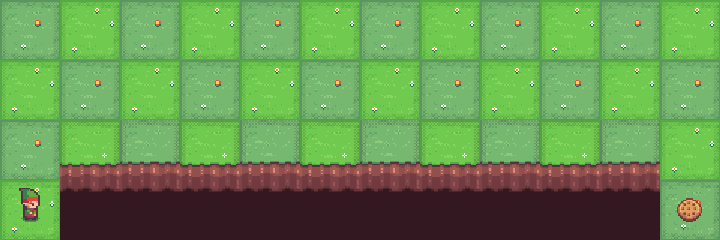

In [ ]:
env.render()
env.reset()
env.render()
env.step(env.action_space.sample())
print(env.action_space.sample())
env.render()